# CREDIT CARD FRAUD DETECTION

`Objective` : **To build a fraud detection model helping banks to identify credit card frauds and be vigilant enough to reduce losses incurred due to such unauthorized transactions by the fraudsters.**

` Data Understanding` : **The data set contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from 1 Jan 2019 to 31 Dec 2020. It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions. The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. Now, since the data set is highly imbalanced, it needs to be handled before model building. The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise.**

# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import datetime as dt

import sklearn
from sklearn.preprocessing import MinMaxScaler,RobustScaler

#For displaying rows and columns upto 100
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

# DATA UNDERSTANDING

In [2]:
#reading fraud test dataset
cred_fraud_test = pd.read_csv("fraudTest.csv")
cred_fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
#reading fraud train dataset
cred_fraud_train = pd.read_csv("fraudTrain.csv")
cred_fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
#Removing Unnamed column for test dataset
cred_fraud_test = cred_fraud_test.drop(cred_fraud_test.columns[0],axis=1)
cred_fraud_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
#Removing Unnamed column for train dataset
cred_fraud_train = cred_fraud_train.drop(cred_fraud_train.columns[0],axis=1)
cred_fraud_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
#Combining dataset
cred_fraud_df = pd.concat([cred_fraud_test,cred_fraud_train])
cred_fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
#Showing the information,shape,null values and numerical description of cred_fraud_df dataset
def info_cred_df(dataframe):
        print(dataframe.info())                                                        #Information of cred_fraud dataset
        print("\nShape of the dataset is:",dataframe.shape)                            #Shape of cred_fraud
        print("\nNull Values in test dataset are:\n",dataframe.isnull().sum())         #Checking null values
        print("\nNumerical description of test dataset is:\n",dataframe.describe())    #Numerical Description of cred_fraud dataset        
info_cred_df(cred_fraud_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

# DATA CLEANING

### DATA IMBALANCE

In [8]:
#Count of transactions that are fraud and non-fraud.
fnd = cred_fraud_df.is_fraud.value_counts()
print(fnd)
print(cred_fraud_df.is_fraud.value_counts(normalize=True)*100)

0    1842743
1       9651
Name: is_fraud, dtype: int64
0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


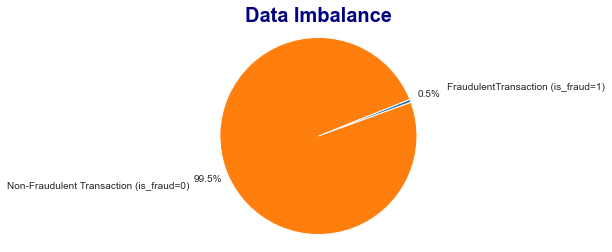

In [9]:
#Data Imbalance
fraud_tran= fnd[1]/cred_fraud_df['is_fraud'].count()*100
nfraud_tran = fnd[0]/cred_fraud_df['is_fraud'].count()*100

label = ['FraudulentTransaction (is_fraud=1)','Non-Fraudulent Transaction (is_fraud=0)']
values = [fraud_tran, nfraud_tran]

fig1, ax1 = plt.subplots()
ax1.pie(values,labels=label, autopct='%1.1f%%',shadow=False, startangle=20, pctdistance=1.2,labeldistance=1.4)
ax1.axis('equal') 
plt.title('Data Imbalance',fontsize=20, color='navy', fontweight='bold')
plt.show()

In [10]:
#Unique values
cred_fraud_df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [11]:
#Finding out the date, day and month from trans_date_trans_time column from cred_fraud_df dataset
cred_fraud_df['trans_date_trans_time']=pd.to_datetime(cred_fraud_df['trans_date_trans_time'])
cred_fraud_df['trans_date']=cred_fraud_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
cred_fraud_df['trans_date']=pd.to_datetime(cred_fraud_df['trans_date'])
cred_fraud_df['dob']=pd.to_datetime(cred_fraud_df['dob'])
cred_fraud_df['trans_day'] = cred_fraud_df['trans_date_trans_time'].dt.day_name()
cred_fraud_df['trans_month'] = cred_fraud_df['trans_date_trans_time'].dt.month_name()
cred_fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_day,trans_month
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,Sunday,June
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,Sunday,June
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,Sunday,June
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,Sunday,June
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,Sunday,June


In [12]:
#Customer's age
cred_fraud_df['cust_age'] = np.round((cred_fraud_df['trans_date_trans_time'] - cred_fraud_df['dob'])/np.timedelta64(1,'Y'))
cred_fraud_df['cust_age']

0          52.0
1          30.0
2          50.0
3          33.0
4          65.0
           ... 
1296670    59.0
1296671    41.0
1296672    53.0
1296673    40.0
1296674    25.0
Name: cust_age, Length: 1852394, dtype: float64

In [13]:
#Count distribution of customers on the basis of age.
cred_fraud_df.cust_age.value_counts()

35.0    54733
47.0    53359
48.0    52733
34.0    49023
44.0    48935
33.0    47594
32.0    47436
36.0    46311
45.0    45816
46.0    43224
43.0    42854
31.0    40274
30.0    40159
49.0    40093
42.0    39697
29.0    38659
39.0    34379
26.0    34074
41.0    33732
37.0    33620
27.0    33104
53.0    32150
38.0    31529
50.0    31366
40.0    30748
54.0    30232
22.0    29265
52.0    28714
28.0    28614
58.0    27392
25.0    27107
51.0    26200
65.0    26170
23.0    26083
57.0    25895
64.0    24632
55.0    24601
21.0    24049
61.0    23831
60.0    23734
59.0    22811
56.0    22205
24.0    21322
66.0    20167
20.0    19891
63.0    19366
62.0    17771
67.0    15419
70.0    15265
69.0    15259
68.0    14981
74.0    14719
71.0    13384
75.0    11971
79.0    11753
19.0    10904
78.0    10283
73.0     9841
72.0     9490
80.0     9408
84.0     8920
16.0     8043
91.0     7709
93.0     7435
85.0     7400
90.0     7102
92.0     6864
83.0     6629
81.0     6340
77.0     6301
15.0     6038
76.0  

In [14]:
#Customer age group created for better understanding regarding transactions
cred_fraud_df['cust_age_group'] = pd.cut(cred_fraud_df['cust_age'], 
                         bins=[10,20,30,40,50,60,1000], 
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])
cred_fraud_df['cust_age_group'].value_counts()

40-50         431809
30-40         415647
60 - Above    383688
20-30         302436
50-60         263934
10-20          54880
Name: cust_age_group, dtype: int64

In [15]:
#Gender distribution
cred_fraud_df.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [16]:
#Categories distribution
cred_fraud_df.category.value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [17]:
#Extracting numerical columns excluding some data types
numerical_col = cred_fraud_df.select_dtypes(exclude=['object','datetime64[ns]','category'])
numerical_col.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,cust_age
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,52.0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,30.0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,50.0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,33.0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,65.0


In [18]:
#Created a new variable showing numerical columns from dataset cred_fraud_df for visualization purpose
cred_numer_col = cred_fraud_df [["amt","zip","lat","long","city_pop","unix_time","merch_lat","merch_long"]]
cred_numer_col.head()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714
1,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431
2,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111
3,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061
4,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734


In [19]:
#Extracting categorical columns on the basis of data types
categorical_col = cred_fraud_df.select_dtypes(exclude=['int64','datetime64[ns]','float'])
categorical_col.head()

,merchant,category,first,last,gender,street,city,state,job,trans_num,trans_day,trans_month,cust_age_group
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,Sunday,June,50-60
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,Sunday,June,20-30
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,Sunday,June,40-50
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,Sunday,June,30-40
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,Sunday,June,60 - Above


In [20]:
#Created a new variable with categorical columns from dataset  cred_fraud_df for visualization purpose
cred_cat_col = cred_fraud_df [["category","gender","street","city","state","job","merchant"]]
cred_cat_col.head()

,category,gender,street,city,state,job,merchant
0,personal_care,M,351 Darlene Green,Columbia,SC,Mechanical engineer,fraud_Kirlin and Sons
1,personal_care,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",fraud_Sporer-Keebler
2,health_fitness,F,9333 Valentine Point,Bellmore,NY,"Librarian, public","fraud_Swaniawski, Nitzsche and Welch"
3,misc_pos,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,fraud_Haley Group
4,travel,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,fraud_Johnston-Casper


# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS 

### NUMERICAL VARIABLES

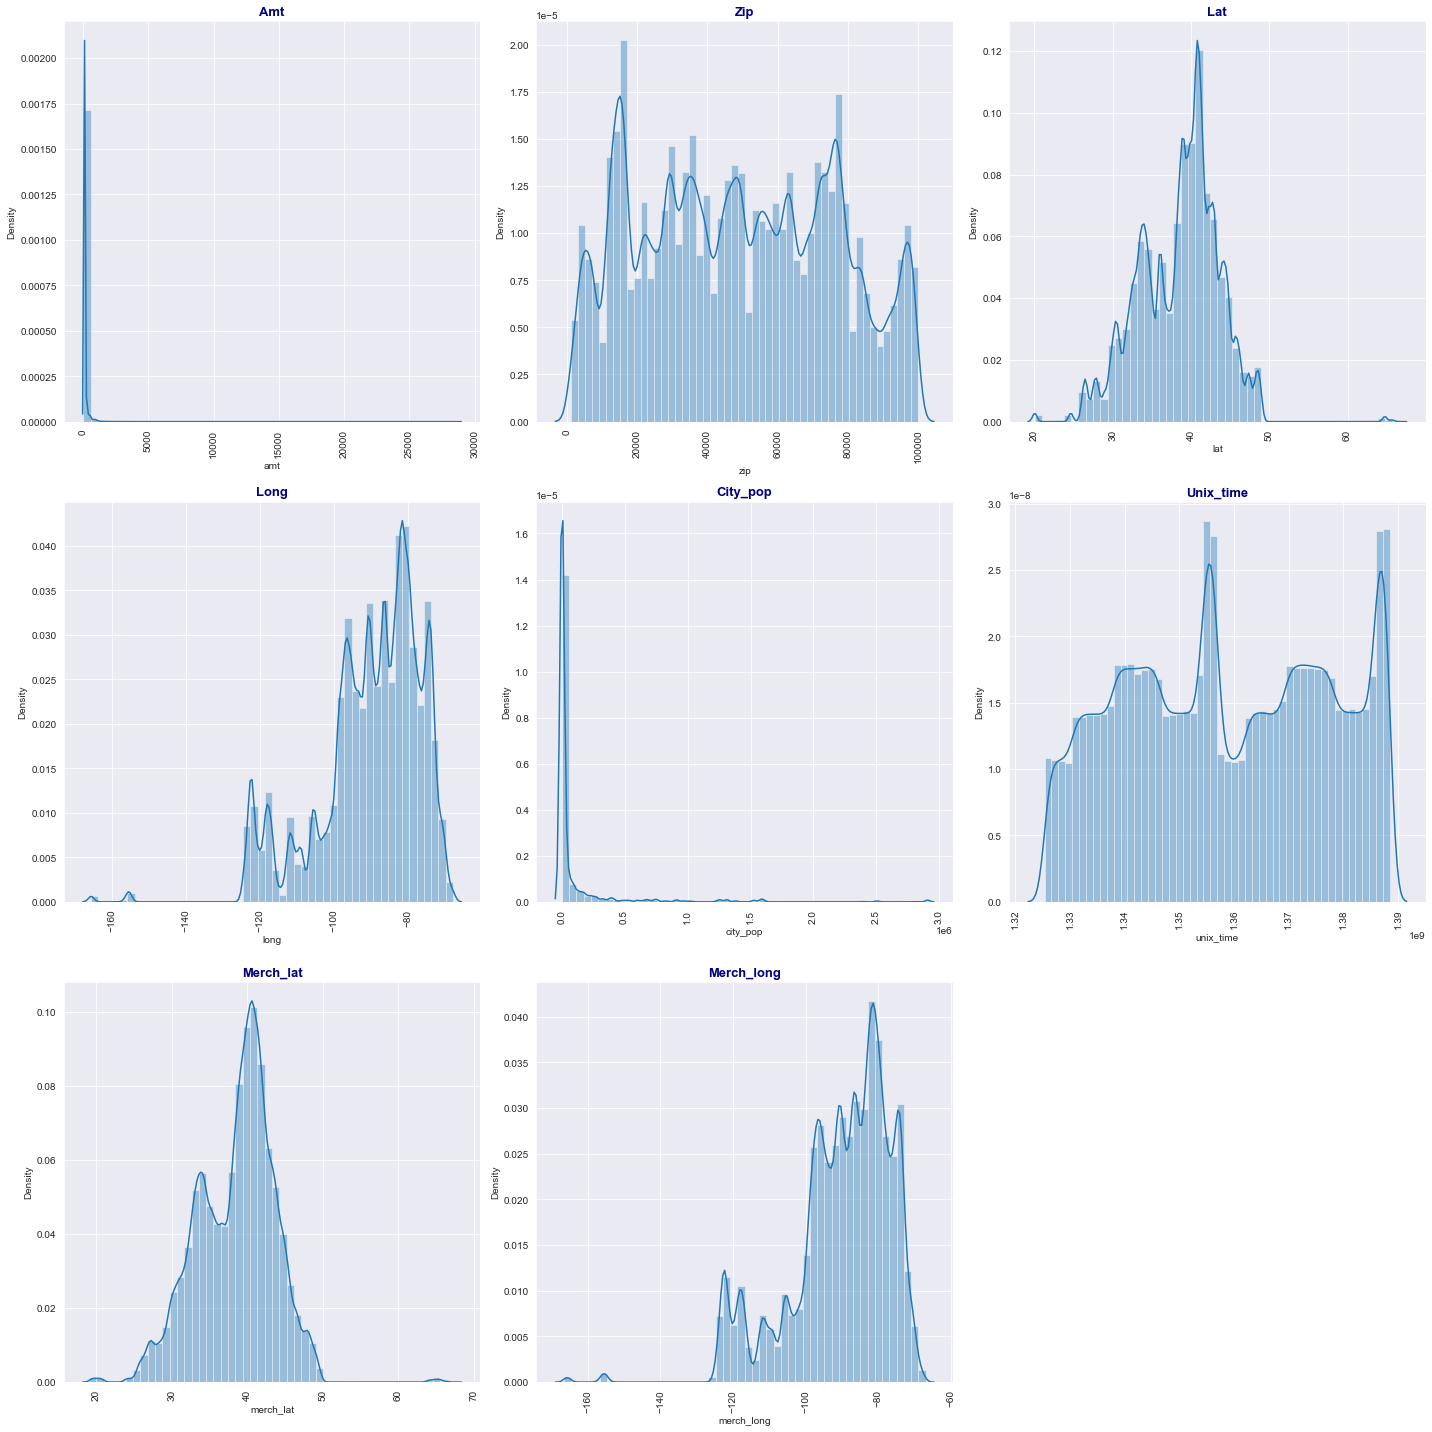

In [21]:
plt.figure(figsize=[20,20])
j=1
for i in cred_numer_col:
    plt.subplot(3,3,j)
    sns.distplot(cred_fraud_df[i])
    plt.title(i.capitalize(), fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation = 90)
    j= j+1
plt.tight_layout()
plt.show()   

### CATEGORICAL VARIABLES

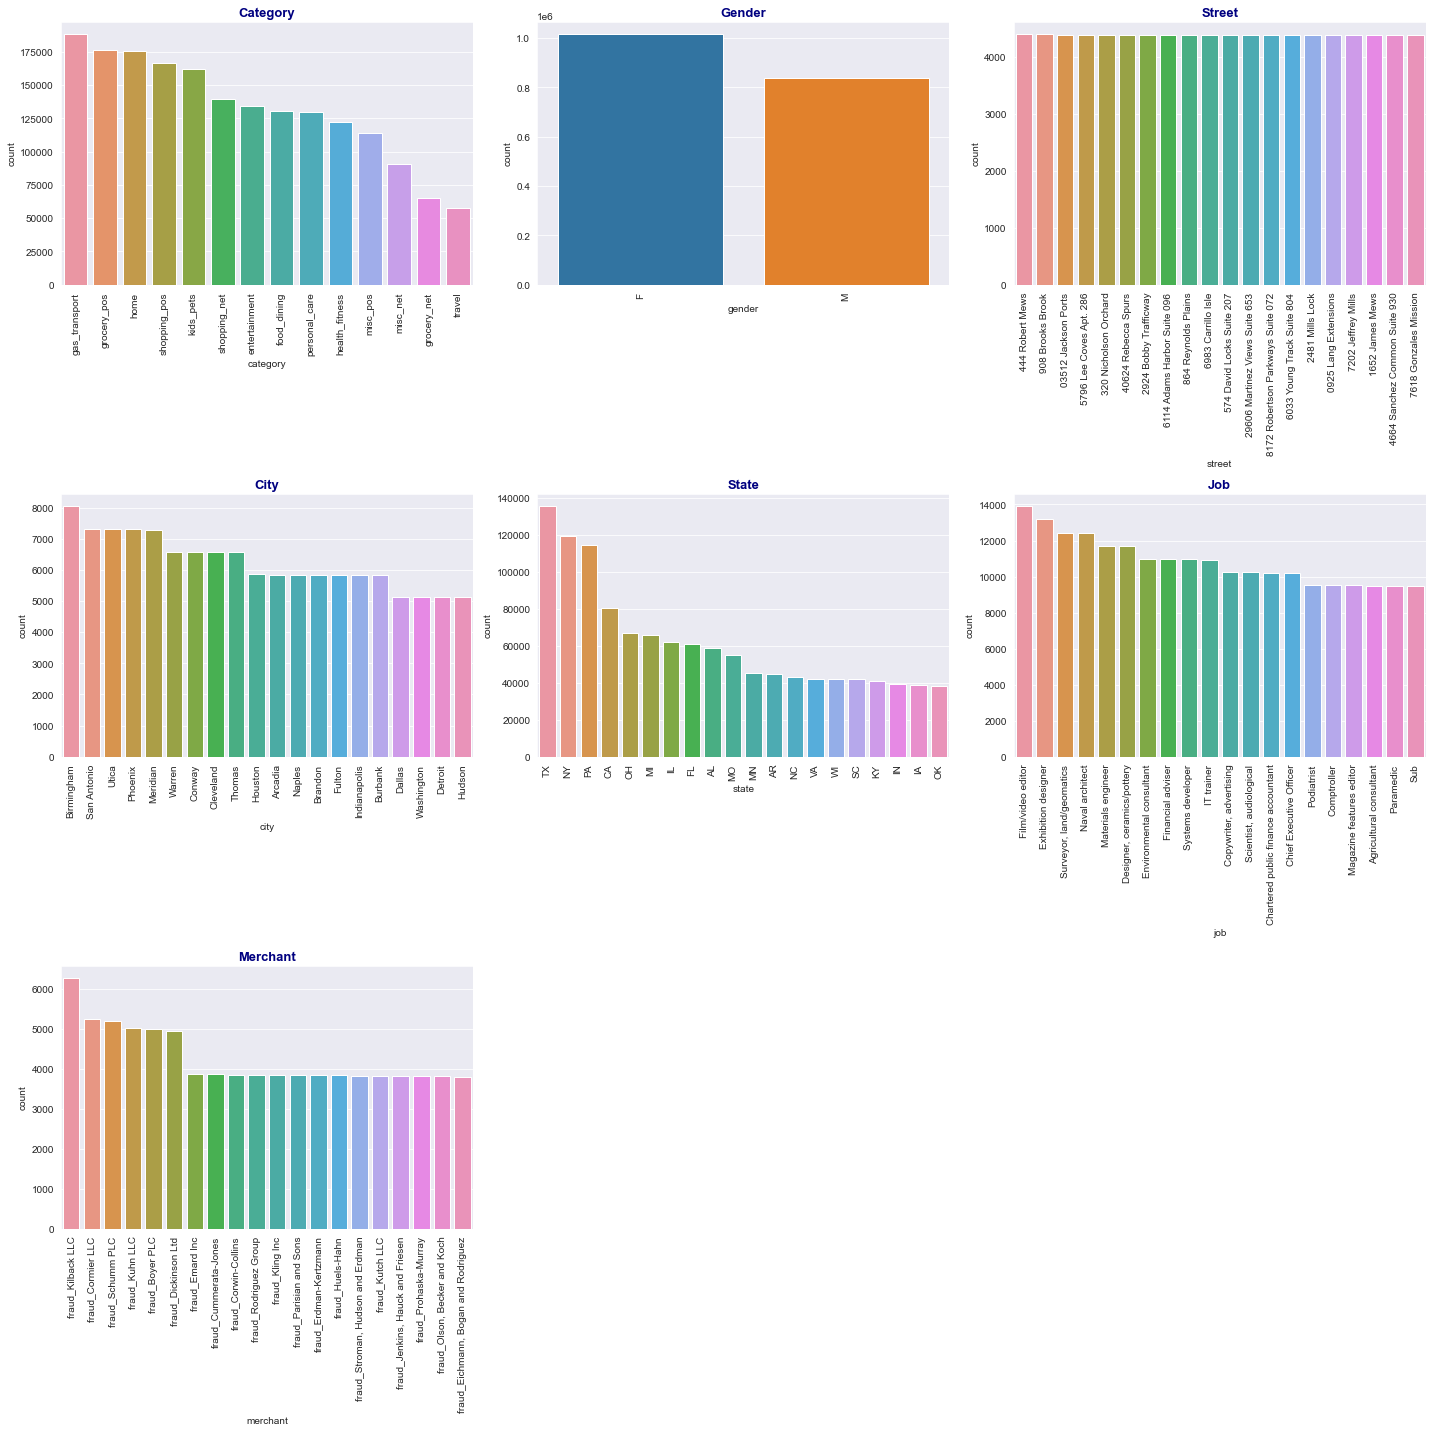

In [22]:
plt.figure(figsize=[20,20])
j=1
for i in cred_cat_col:
    plt.subplot(3,3,j)
    sns.countplot(cred_fraud_df[i],order = cred_fraud_df[i].value_counts().iloc[:20].index)
    plt.title(i.capitalize(), fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation = 90)
    j= j+1
plt.tight_layout()
plt.show()

` Inference `: 
- city_pop and amt columns are highly skewed.
- Majority of transaction is done from the Kilback LLC merchant.
- Most of the transactions are been done by the customers having job as Film video editor, Exhibition designer and surveyor of land or geomatics.

### DAYS

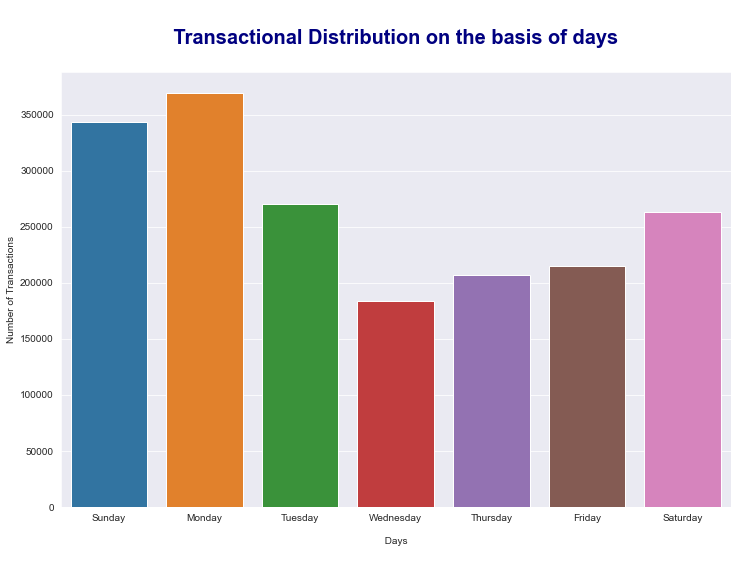

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(cred_fraud_df["trans_day"])
plt.title("\n Transactional Distribution on the basis of days \n", fontdict = {"fontsize" : 20, "fontweight" :"bold", "color" : "navy"})
plt.xlabel("\n Days \n")
plt.ylabel("Number of Transactions")
plt.show()

` Inference ` : Most of the transactions were done on Sunday and Monday.

### CATEGORIES

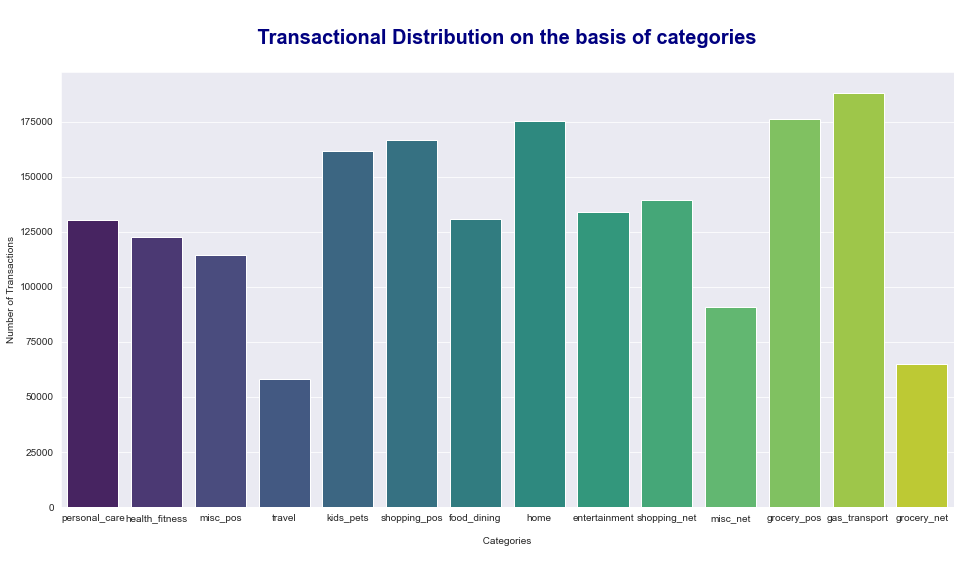

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(cred_fraud_df["category"],palette="viridis")
plt.title("\n Transactional Distribution on the basis of categories \n", fontdict = {"fontsize" : 20, "fontweight" :"bold", "color" : "navy"})
plt.xlabel("\n Categories \n")
plt.ylabel("Number of Transactions")
plt.show()

`Inference` : Categories like home,grocery_pos and gas_transports has highest amount of transactions above 175000. 150000+ transactions are from kids_pets and shopping_pos

### GENDER

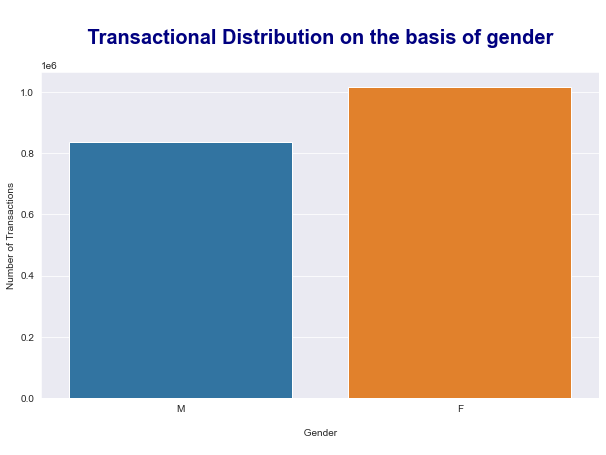

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(cred_fraud_df["gender"])
plt.title("\n Transactional Distribution on the basis of gender \n", fontdict = {"fontsize" : 20, "fontweight" :"bold", "color" : "navy"})
plt.xlabel("\n Gender \n")
plt.ylabel("Number of Transactions")
plt.show()

`Inference` : Most of the transactions were done by the female users.

### MONTH

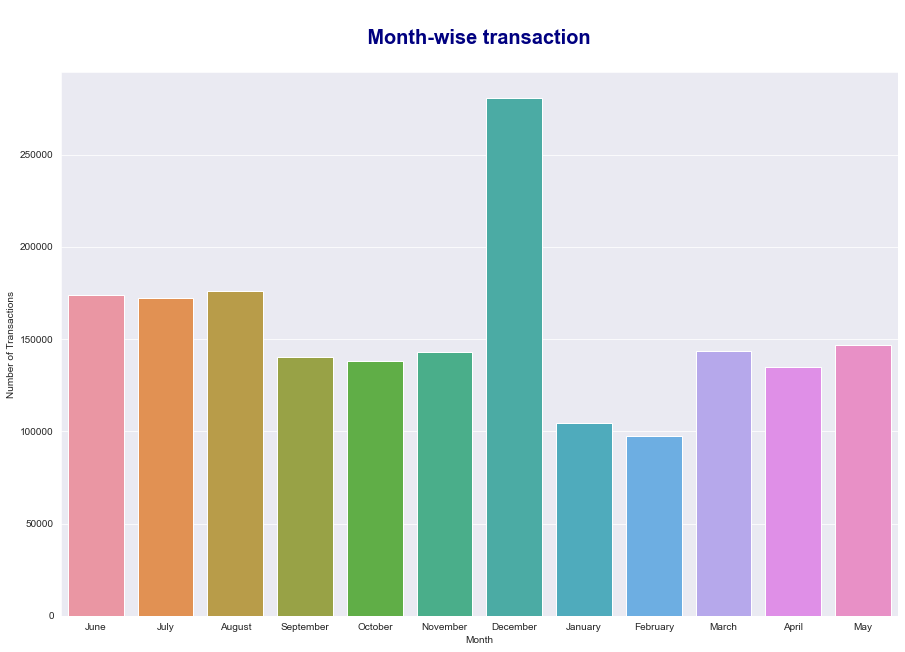

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(cred_fraud_df["trans_month"])
plt.title("\n Month-wise transaction \n", fontdict = {"fontsize" : 20, "fontweight" :"bold", "color" : "navy"})
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

`Inference`: 250000+ transactions were done in December month.

### CUSTOMER AGE GROUP

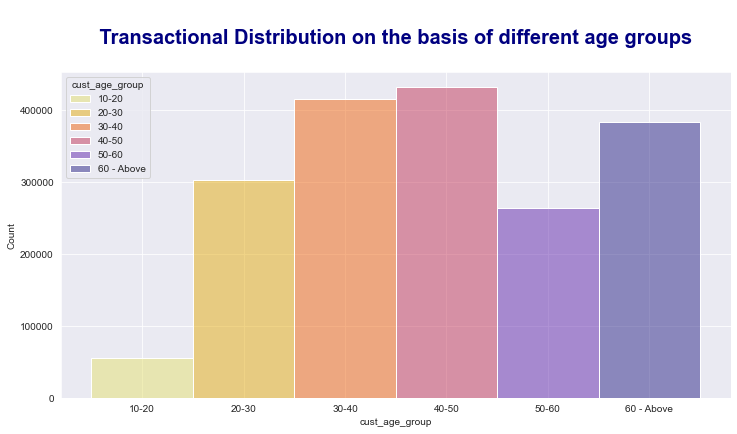

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(data=cred_fraud_df, x="cust_age_group",palette="CMRmap_r",hue="cust_age_group")
plt.title("\n Transactional Distribution on the basis of different age groups \n", fontdict = {"fontsize" : 20, "fontweight" :"bold", "color" : "navy"})
plt.show()

`Inference` : Customers of age group ranging from 30-50 did most of the transactions.

### TRANSACTIONAL AMOUNT

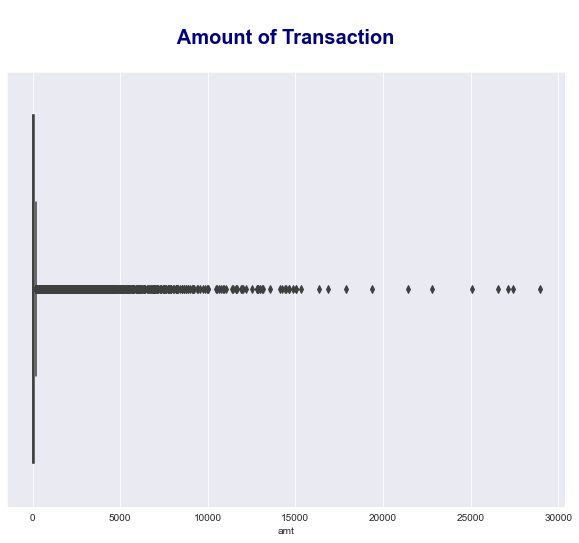

In [28]:
plt.figure(figsize=[10,8])
sns.boxplot(data = cred_fraud_df, x="amt")
plt.title("\n Amount of Transaction \n",fontdict = {"fontsize" : 20, "fontweight" :"bold", "color" : "navy"})
plt.show()

`Inference` : As per the above boxplot, there seems to be a heavy amount of transactions taken place in various cities. Even fraudulent transactions were fulfilled also.

## BIVARIATE ANALYSIS

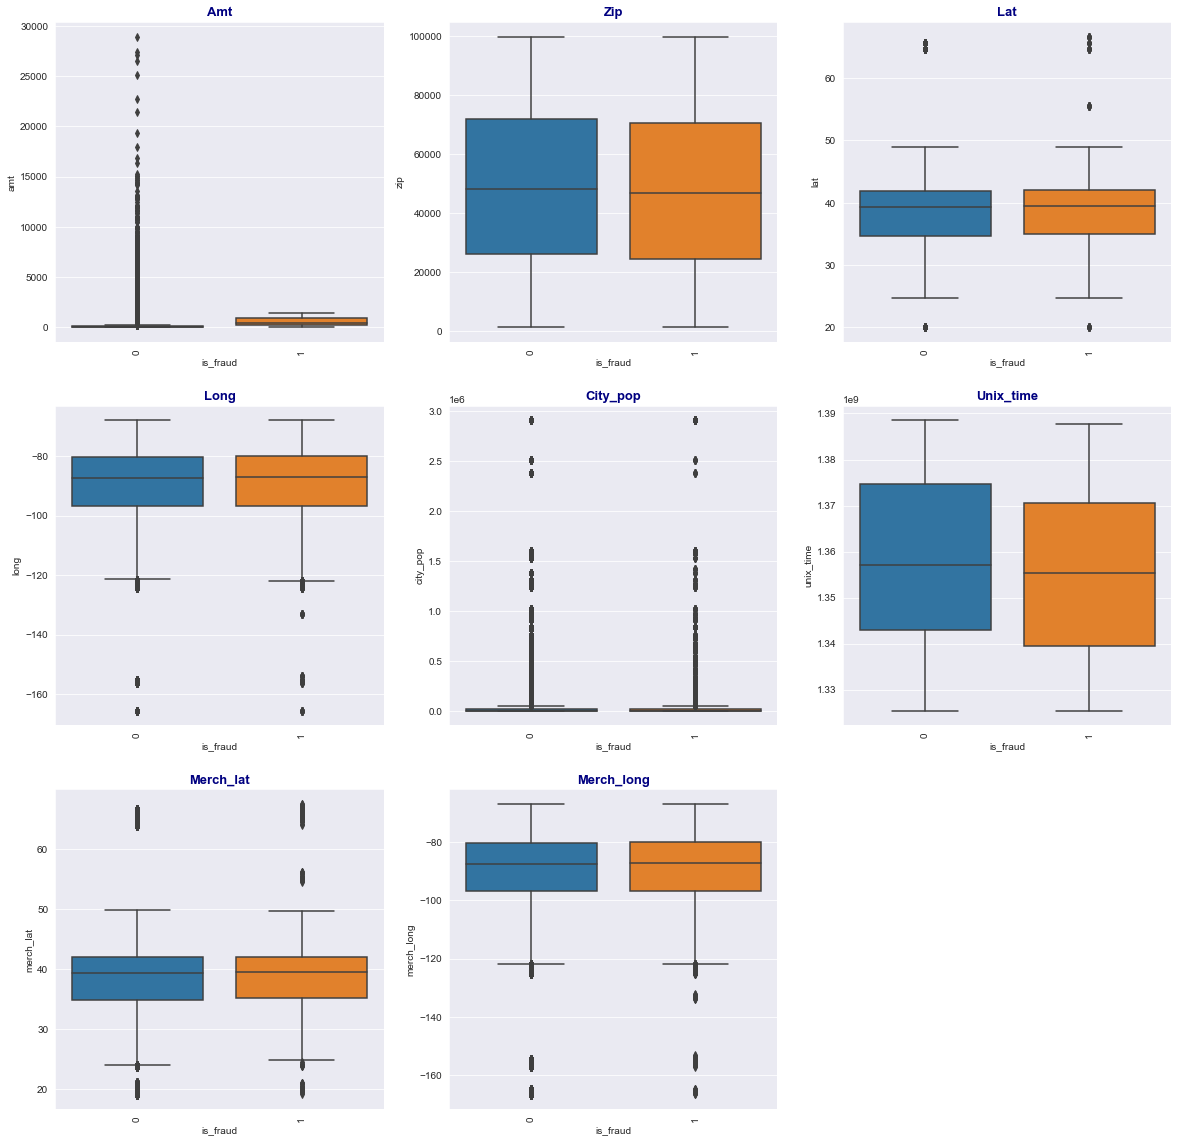

In [29]:
plt.figure(figsize=[20,20])
j=1
for i in cred_numer_col:
    plt.subplot(3,3,j)
    sns.boxplot(data = cred_fraud_df, y= cred_fraud_df[i],x="is_fraud")
    plt.title(i.capitalize(), fontdict={'size':13, 'color':'navy', 'fontweight':'bold'})
    plt.xticks(rotation = 90)
    j= j+1
plt.show()

## CORRELATION BETWEEN VARIABLES

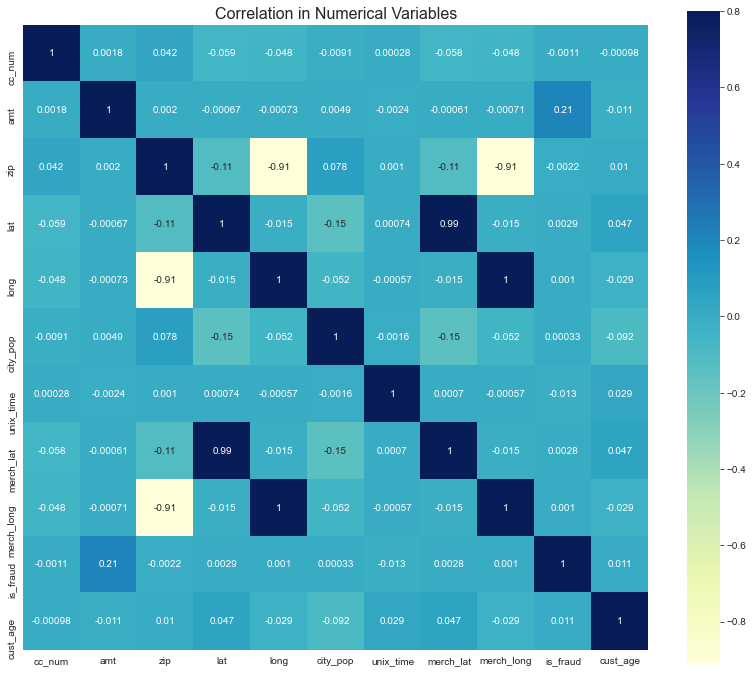

In [30]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation in Numerical Variables',y=1,size=16)
sns.heatmap(numerical_col.corr(),square = True, vmax=0.8, annot= True,cmap="YlGnBu")
plt.show()

`Inference`: Few columns like merch_long,merch_lat,long and lat are positively correlated in heatmap.

## DUMMY VARIABLES

In [31]:
#selecting relevant categorical columns for dummy variables
cred_categor = cred_fraud_df [["category","gender","cust_age_group","trans_day","trans_month"]]
cred_dummy=pd.get_dummies(cred_categor,drop_first=True)
cred_dummy.head()

,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday,trans_month_August,trans_month_December,trans_month_February,trans_month_January,trans_month_July,trans_month_June,trans_month_March,trans_month_May,trans_month_November,trans_month_October,trans_month_September
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
#Concatenation of dummy variables dataframe with original one
cred_dummy = pd.concat([cred_fraud_df,cred_dummy],axis=1)
cred_dummy.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_day,trans_month,cust_age,cust_age_group,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday,trans_month_August,trans_month_December,trans_month_February,trans_month_January,trans_month_July,trans_month_June,trans_month_March,trans_month_May,trans_month_November,trans_month_October,trans_month_September
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,Sunday,June,52.0,50-60,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,Sunday,June,30.0,20-30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,Sunday,June,50.0,40-50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,Sunday,June,33.0,30-40,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,Sunday,June,65.0,60 - Above,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
#Dropping the irrelevant columns
cred_dummy.drop(['trans_date_trans_time','merchant','category','first','last','gender','street','city','state',
                 'job','dob','trans_num','trans_date','trans_day','trans_month','cust_age_group','cust_age','city_pop','cc_num','zip','lat','long','unix_time','merch_lat','merch_long'], axis=1, inplace=True)
cred_dummy.head()

,amt,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday,trans_month_August,trans_month_December,trans_month_February,trans_month_January,trans_month_July,trans_month_June,trans_month_March,trans_month_May,trans_month_November,trans_month_October,trans_month_September
0,2.86,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,29.84,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,41.28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,60.05,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.19,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# TEST TRAIN SPLIT

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = cred_dummy.drop(['is_fraud'], axis=1)
y = cred_dummy['is_fraud']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [37]:
#Shape of the train and test data
print("The shape of X_Train:",X_train.shape)
print("The shape of X_Test:",X_test.shape)

The shape of X_Train: (1296675, 37)
The shape of X_Test: (555719, 37)


In [38]:
X_train.head()

,amt,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,cust_age_group_20-30,cust_age_group_30-40,cust_age_group_40-50,cust_age_group_50-60,cust_age_group_60 - Above,trans_day_Monday,trans_day_Saturday,trans_day_Sunday,trans_day_Thursday,trans_day_Tuesday,trans_day_Wednesday,trans_month_August,trans_month_December,trans_month_February,trans_month_January,trans_month_July,trans_month_June,trans_month_March,trans_month_May,trans_month_November,trans_month_October,trans_month_September
785991,86.08,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
532137,37.30,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
273057,88.88,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1065122,450.86,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
526588,172.85,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## DATA SCALING AND OVERSAMPLING

In [39]:
#Scaling of X_train data
col_numer = [col for col in X_train.columns if X_train[col].max()>1]
from sklearn import preprocessing
scaler = RobustScaler()
scaled_df= scaler.fit_transform(X_train[col_numer])

In [40]:
#Oversampling for imalanced data using SMOTE
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
smo = SMOTE(random_state=42)
X_train_smo,y_train_smo = smo.fit_resample(X_train,y_train)

In [41]:
print("X_train_smo Shape:", X_train_smo.shape)
print("y_train_smo Shape:", y_train_smo.shape)

X_train_smo Shape: (2579828, 37)
y_train_smo Shape: (2579828,)


# DATA MODELLING

### LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train_smo, y_train_smo)

### RFE

In [43]:
#Features selection using Recursive Feature elimination. 15 features to be selected.
from sklearn.feature_selection import RFE
rfe_a = RFE(logreg,n_features_to_select =15)
rfe_a = rfe_a.fit(X_train_smo, y_train_smo)

In [44]:
rfe_a.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [45]:
list(zip(X_train_smo.columns, rfe_a.support_, rfe_a.ranking_))

[('amt', False, 23),
 ('category_food_dining', False, 9),
 ('category_gas_transport', False, 21),
 ('category_grocery_net', False, 11),
 ('category_grocery_pos', False, 22),
 ('category_health_fitness', False, 13),
 ('category_home', False, 10),
 ('category_kids_pets', False, 15),
 ('category_misc_net', False, 18),
 ('category_misc_pos', False, 17),
 ('category_personal_care', False, 16),
 ('category_shopping_net', False, 20),
 ('category_shopping_pos', False, 12),
 ('category_travel', False, 14),
 ('gender_M', False, 19),
 ('cust_age_group_20-30', True, 1),
 ('cust_age_group_30-40', True, 1),
 ('cust_age_group_40-50', True, 1),
 ('cust_age_group_50-60', True, 1),
 ('cust_age_group_60 - Above', False, 2),
 ('trans_day_Monday', False, 4),
 ('trans_day_Saturday', False, 8),
 ('trans_day_Sunday', False, 5),
 ('trans_day_Thursday', False, 7),
 ('trans_day_Tuesday', False, 3),
 ('trans_day_Wednesday', False, 6),
 ('trans_month_August', True, 1),
 ('trans_month_December', True, 1),
 ('trans_

In [46]:
rfe_cols = X_train_smo.columns[rfe_a.support_]
rfe_cols

Index(['cust_age_group_20-30', 'cust_age_group_30-40', 'cust_age_group_40-50',
       'cust_age_group_50-60', 'trans_month_August', 'trans_month_December',
       'trans_month_February', 'trans_month_January', 'trans_month_July',
       'trans_month_June', 'trans_month_March', 'trans_month_May',
       'trans_month_November', 'trans_month_October', 'trans_month_September'],
      dtype='object')

### BUILDING LOGISTIC REGRESSION MODEL

### `MODEL - A`

In [47]:
import statsmodels.api as sm 
RFE_model = sm.add_constant(X_train_smo[rfe_cols])
RFE_Log = sm.GLM(y_train_smo,RFE_model, family=sm.families.Binomial())
op = RFE_Log.fit()
op.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              2579828
Model:                            GLM   Df Residuals:                  2579812
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0154e+06
Date:                Mon, 11 Oct 2021   Deviance:                   2.0308e+06
Time:                        03:01:57   Pearson chi2:                 2.60e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.3015      0.004    735.652      0.000       3.293       3.310
cust_age_group_20-30     -1.5673      0.006   -272.861      0.000      -1.579      -1.556
cust_age_group_30-40     -1.9137      0.006   -347.586      0.000      -1.925      -1.903
cust_age_group_40-50     -1.7581      0.005   -332.085      0.000      -1.768      -1.748
cust_age_group_50-60     -1.3893      0.006   -243.378      0.000      -1.400      -1.378
trans_month_August       -3.7938      0.008   -481.221      0.000      -3.809      -3.778
trans_month_December     -4.1058      0.007   -569.162      0.000      -4.120      -4.092
trans_month_February     -2.9990      0.008   -377.724      0.000      -3.015      -2.983
trans_month_January      -3.1879      0.008   -386.645      0.000      -3.204      -3.172
trans_month_July         -4.0288      0.009   -472.540      0.000      -4.046      -4.012
trans_month_June         -3.5633      0.007   -475.895      0.000      -3.578      -3.549
trans_month_March        -3.2083      0.007   -444.185      0.000      -3.222      -3.194
trans_month_May          -3.2471      0.007   -444.834      0.000      -3.261      -3.233
trans_month_November     -3.7778      0.009   -440.340      0.000      -3.795      -3.761
trans_month_October      -3.3627      0.008   -439.968      0.000      -3.378      -3.348
trans_month_September    -3.5596      0.008   -444.679      0.000      -3.575      -3.544
=========================================================================================
"""

### VARIANCE INFLATION FACTOR (VIF)

In [48]:
#vif is used to find out the amount of multicollinearity in a set of multiple regression variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_smo[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_smo[rfe_cols].values, i) for i in range(X_train_smo[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,cust_age_group_20-30,0.0
1,cust_age_group_30-40,0.0
2,cust_age_group_40-50,0.0
3,cust_age_group_50-60,0.0
4,trans_month_August,0.0
5,trans_month_December,0.0
6,trans_month_February,0.0
7,trans_month_January,0.0
8,trans_month_July,0.0
9,trans_month_June,0.0


In [49]:
# Predicted Probability 
y_train_pred = op.predict(RFE_model)

In [50]:
# creating a new df for fraud prediction in y train
y_train_pred =y_train_pred.values.reshape(-1)
fixed_y_train_pred = pd.DataFrame({'Fraud':y_train_smo, 'Fraud_prob': y_train_pred})
fixed_y_train_pred.head()

,Fraud,Fraud_prob
0,0,0.309116
1,0,0.061921
2,0,0.208370
3,0,0.159110
4,0,0.085369


In [51]:
fixed_y_train_pred['Fraud_pred'] = fixed_y_train_pred.Fraud_prob.map(lambda x: 1 if x > 0.5 else 0)
fixed_y_train_pred.head()

,Fraud,Fraud_prob,Fraud_pred
0,0,0.309116,0
1,0,0.061921,0
2,0,0.208370,0
3,0,0.159110,0
4,0,0.085369,0


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [53]:
# Confusion Matrix and Classification report for train data
print("Train Result: ")
print(confusion_matrix(fixed_y_train_pred.Fraud, fixed_y_train_pred.Fraud_pred))
print(classification_report(fixed_y_train_pred.Fraud, fixed_y_train_pred.Fraud_pred))

Train Result: 
[[1115155  174759]
 [ 261040 1028874]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84   1289914
           1       0.85      0.80      0.83   1289914

    accuracy                           0.83   2579828
   macro avg       0.83      0.83      0.83   2579828
weighted avg       0.83      0.83      0.83   2579828



In [54]:
# Confusion Matrix and Classification report for test data
y_test_pred = logreg.predict(X_test)
print("Test Result: ")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Result: 
[[507170  45659]
 [  1642   1248]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    552829
           1       0.03      0.43      0.05      2890

    accuracy                           0.91    555719
   macro avg       0.51      0.67      0.50    555719
weighted avg       0.99      0.91      0.95    555719



### DECISION TREE

In [55]:
#importing required libraries for decision trees.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt.fit(X_train_smo, y_train_smo)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [56]:
# Confusion Matrix and Classification report for train data
print("Train Result: ")
pred_train = dt.predict(X_train_smo)
print(confusion_matrix(y_train_smo, pred_train))
print(classification_report(y_train_smo, pred_train))

Train Result: 
[[1258492   31422]
 [   4832 1285082]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1289914
           1       0.98      1.00      0.99   1289914

    accuracy                           0.99   2579828
   macro avg       0.99      0.99      0.99   2579828
weighted avg       0.99      0.99      0.99   2579828



In [57]:
# Confusion Matrix and Classification report for test data
print("Test Result: ")
pred_test = dt.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Result: 
[[538304  14525]
 [   509   2381]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    552829
           1       0.14      0.82      0.24      2890

    accuracy                           0.97    555719
   macro avg       0.57      0.90      0.61    555719
weighted avg       0.99      0.97      0.98    555719



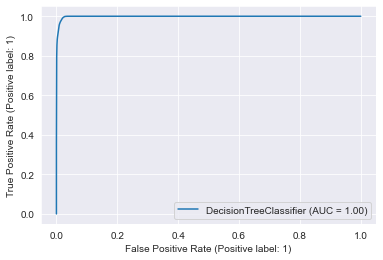

In [58]:
#Plotting ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt, X_train_smo, y_train_smo, drop_intermediate=False)
plt.show()

`NOTE`:
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

### RANDOM FOREST

In [59]:
#importing required libraries for Random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50,max_depth = 20,random_state=345, verbose = 1)
rf.fit(X_train_smo, y_train_smo)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.8min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [60]:
#Confusion matrix and classification report of train dataset
print("Train Result: ")
pred_train = rf.predict(X_train_smo)
print(confusion_matrix(y_train_smo, pred_train))
print(classification_report(y_train_smo, pred_train))

Train Result: 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.2s finished


[[1277482   12432]
 [  17740 1272174]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1289914
           1       0.99      0.99      0.99   1289914

    accuracy                           0.99   2579828
   macro avg       0.99      0.99      0.99   2579828
weighted avg       0.99      0.99      0.99   2579828



In [61]:
#Confusion matrix and classification report of train dataset
print("Test Result: ")
pred_test = rf.predict(X_test)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Result: 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.8s finished


[[546992   5837]
 [   645   2245]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    552829
           1       0.28      0.78      0.41      2890

    accuracy                           0.99    555719
   macro avg       0.64      0.88      0.70    555719
weighted avg       1.00      0.99      0.99    555719



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.3s finished


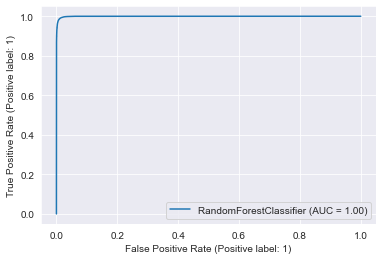

In [62]:
#ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, X_train_smo, y_train_smo)
plt.show()

# COST BENEFIT ANALYSIS

In [63]:
#average monthly number of transactions
amon_num_trans = cred_fraud_df.groupby(cred_fraud_df['trans_month'])[['trans_num','cc_num']].nunique().reset_index()
amon_num_trans.columns = ['month','transaction_count','customers']
amon_num_trans

,month,transaction_count,customers
0,April,134970,919
1,August,176118,911
2,December,280598,918
3,February,97657,919
4,January,104727,916
5,July,172444,913
6,June,173869,911
7,March,143789,920
8,May,146875,917
9,November,143056,912


In [64]:
print((amon_num_trans['transaction_count'].mean())/2)

77183.08333333333


In [65]:
#average monthly number of fraud transactions
fraud_trans_data = cred_fraud_df[cred_fraud_df['is_fraud']==1]
mon_num_trans = fraud_trans_data.groupby(fraud_trans_data['trans_month'])[['trans_num','cc_num']].nunique().reset_index()
mon_num_trans.columns = ['month','fraud_transaction_count','customers']
mon_num_trans

,month,fraud_transaction_count,customers
0,April,678,77
1,August,797,80
2,December,850,88
3,February,853,88
4,January,849,90
5,July,652,71
6,June,821,82
7,March,938,94
8,May,935,96
9,November,682,72


In [66]:
print((mon_num_trans['fraud_transaction_count'].mean())/2)

402.125


In [67]:
#average amount per fraud transactions
fraud_amt_data = cred_fraud_df[cred_fraud_df['is_fraud']==1]
print(fraud_amt_data.amt.mean())

530.6614122888809


In [68]:
y_train_trans = pd.DataFrame(fixed_y_train_pred.Fraud)
y_train_trans = y_train_trans.rename(columns={"Fraud":"pfraud"})
y_train_trans

,pfraud
0,0
1,0
2,0
3,0
4,0
...,...
2579823,1
2579824,1
2579825,1
2579826,1


In [69]:
y_test_trans = pd.DataFrame(y_test_pred)
y_test_trans = y_test_trans.rename(columns={0:"pfraud"})
y_test_trans

,pfraud
0,0
1,0
2,0
3,0
4,0
...,...
555714,0
555715,0
555716,0
555717,0


In [70]:
cred_x = cred_fraud_train[["trans_num"]]
cred_x_a = pd.concat([y_train_trans,cred_x],axis=1)
cred_x1 = cred_fraud_test[["trans_num"]]
cred_x1_a = pd.concat([y_test_trans,cred_x1],axis=1)
cred_c_df = pd.concat([cred_x_a,cred_x1_a],axis=0)
cred_c_df

,pfraud,trans_num
0,0,0b242abb623afc578575680df30655b9
1,0,1f76529f8574734946361c461b024d99
2,0,a1a22d70485983eac12b5b88dad1cf95
3,0,6b849c168bdad6f867558c3793159a81
4,0,a41d7549acf90789359a9aa5346dcb46
...,...,...
555714,0,9b1f753c79894c9f4b71f04581835ada
555715,0,2090647dac2c89a1d86c514c427f5b91
555716,0,6c5b7c8add471975aa0fec023b2e8408
555717,0,14392d723bb7737606b2700ac791b7aa


In [71]:
#average number of transactions per month detected as fraudulent by the model 
print(cred_c_df[cred_c_df["pfraud"]==1].trans_num.count()/24)

2236.1666666666665


### `INFERENCE` :
- Average number of transactions per month = 77183.08
- Average number of fraud transactions per month = 402.12
- Average amount of fraud transactions per month = 530.66
- Average number of transactions per month detected as fraudulent by the model(TF) = 2236.16
- Due to the highest value of accuracy, precision and recall in decision trees and random forest, the model is good enough to detect fraudulent transactions and focus on features in which it takes place majorly.